## Data Analysis

Here, we will perform a data analysis task using the datasets provided using '**Python**' and **Jupyter Notebook**. The goal is to analyze and derive insights from various sales-related data. The datasets we are working with are:

- `order_list.csv`: Contains basic order details (Order ID, Order Date, Customer Name, etc.)
- `order_details.csv`: Contains information about the products ordered (Category, Amount, Profit, etc.)
- `sales_target.csv`: Contains sales targets for various categories across different months.

We will begin by importing the necessary libraries and loading the datasets into pandas DataFrames.

In [1]:
import pandas as pd
import numpy as np

In [2]:
## Loading the datasets into pandas DataFrame

order_list = pd.read_csv('order_list.csv')
order_details = pd.read_csv('order_details.csv')
sales_target = pd.read_csv('sales_target.csv')

### Data Inspection

Next, let's take a look at the structure of the datasets to understand their dimensions and check if they have been loaded correctly.
We will use the `.info()` method to inspect the datasets' basic details.


In [3]:
## Inspect the structure of order_list dataset

print("  order_list DataFrame Info:")
print(order_list.info())

print('\n Checking for null or missing values')
print(order_list.isnull().sum())

  order_list DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      500 non-null    object
 1   Order Date    500 non-null    object
 2   CustomerName  500 non-null    object
 3   State         500 non-null    object
 4   City          500 non-null    object
dtypes: object(5)
memory usage: 22.0+ KB
None

 Checking for null or missing values
Order ID        60
Order Date      60
CustomerName    60
State           60
City            60
dtype: int64


In [4]:
## Inspect the structure of order_details dataset

print("order_details DataFrame Info:")
print(order_details.info())

print('\n Checking for null or missing values')
print(order_details.isnull().sum())

order_details DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      1500 non-null   object 
 1   Amount        1500 non-null   float64
 2   Profit        1500 non-null   float64
 3   Quantity      1500 non-null   int64  
 4   Category      1500 non-null   object 
 5   Sub-Category  1500 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 70.4+ KB
None

 Checking for null or missing values
Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
dtype: int64


In [5]:
## Inspect the structure of 'salas_target' dataset

print("sales_target DataFrame Info:")
print(sales_target.info())

print('\n Checking for null or missing values')
print(sales_target.isnull().sum())

sales_target DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Month of Order Date  36 non-null     object 
 1   Category             36 non-null     object 
 2   Target               36 non-null     float64
dtypes: float64(1), object(2)
memory usage: 996.0+ bytes
None

 Checking for null or missing values
Month of Order Date    0
Category               0
Target                 0
dtype: int64


### Handling Missing Data

Upon inspection, we noticed that there are equal numbers missing values in all the columns of the `order_list` dataset. 
We will need to handle these missing values before continuing with our analysis.

In [6]:
## Handling the missing data droping the rows with missing values

order_list.dropna(inplace=True)
order_list.isnull().sum()

Order ID        0
Order Date      0
CustomerName    0
State           0
City            0
dtype: int64

In [7]:
## Merge the List of Orders and Order Details datasets on the basis of Order ID. 
## Calculate the total sales (Amount) for each category across all orders.

merged_df = order_list.merge(order_details, on='Order ID')

## Show top 5 row of the mearged data sett
merged_df.head()

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5,Clothing,Stole
2,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,01-04-2018,Pearl,Maharashtra,Pune,168.0,-111.0,2,Electronics,Phones


### Data Summary

Let’s now take a quick look at the first few rows of each dataset to get an overview of the data.

In [8]:
## View the first few rows of each dataset

print("Order List Head:")
print(order_list.head())

print("\nOrder Details Head:")
print(order_details.head())

print("\nSales Target Head:")
print(sales_target.head())

Order List Head:
  Order ID  Order Date CustomerName           State       City
0  B-25601  01-04-2018       Bharat         Gujarat  Ahmedabad
1  B-25602  01-04-2018        Pearl     Maharashtra       Pune
2  B-25603  03-04-2018        Jahan  Madhya Pradesh     Bhopal
3  B-25604  03-04-2018       Divsha       Rajasthan     Jaipur
4  B-25605  05-04-2018      Kasheen     West Bengal    Kolkata

Order Details Head:
  Order ID  Amount  Profit  Quantity     Category      Sub-Category
0  B-25601  1275.0 -1148.0         7    Furniture         Bookcases
1  B-25601    66.0   -12.0         5     Clothing             Stole
2  B-25601     8.0    -2.0         3     Clothing       Hankerchief
3  B-25601    80.0   -56.0         4  Electronics  Electronic Games
4  B-25602   168.0  -111.0         2  Electronics            Phones

Sales Target Head:
  Month of Order Date   Category   Target
0              Apr-18  Furniture  10400.0
1              May-18  Furniture  10500.0
2              Jun-18  Furnitu

-----------------------

## Question 1 : Sales Analysis

### Part 1: Sales and Profitability Analysis

In this task, we will perform a sales and profitability analysis. The goal is to merge the `order_list` and `order_details` datasets, then calculate the total sales, average profit per order, and profit margin for each product category. Based on these metrics, we will identify the top-performing and underperforming categories and suggest potential reasons for the differences in performance.

In [9]:
## Merge the 'order_list' and 'order_details' datasets on 'Order ID'

merged_df = pd.merge(order_list, order_details, on='Order ID')

## Display the first few rows of the merged data to check the result

merged_df.head()

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5,Clothing,Stole
2,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,01-04-2018,Pearl,Maharashtra,Pune,168.0,-111.0,2,Electronics,Phones


Calculate the total sales (Amount) for each category across all orders

In [10]:
## Groupby 'category' and calculate the total sales (Amount)
total_sale_amount = merged_df.groupby('Category')['Amount'].sum().reset_index()

# Show the total_sale_amount
total_sale_amount

,Category,Amount
0,Clothing,139054.0
1,Electronics,165267.0
2,Furniture,127181.0


For each category, calculate the average profit per order and total profit margin (profit as a percentage of Amount).

In [11]:
## Calculate average profit per order for each category

avg_profit_per_order = merged_df.groupby('Category')['Profit'].mean().reset_index()

# Show avg_profit_per_order
avg_profit_per_order

,Category,Profit
0,Clothing,11.762908
1,Electronics,34.071429
2,Furniture,9.456790


In [12]:
# Calculate the total profit margin as percentage

merged_df['Profit Margin'] = merged_df['Profit'] / merged_df['Amount'] * 100

# groupby 'Category' and calculate average profit

avg_profit_margin = merged_df.groupby('Category')['Profit Margin'].mean().reset_index()

# Show avg_profit_margin
avg_profit_margin

,Category,Profit Margin
0,Clothing,4.132921
1,Electronics,-0.622928
2,Furniture,-6.788811


In [13]:
## Merge the results for total sales, average profit per order and average profit margin

cat_wise_performance = pd.merge(total_sale_amount, avg_profit_per_order, on='Category')
cat_wise_performance = pd.merge(cat_wise_performance, avg_profit_margin, on='Category')

cat_wise_performance.rename(columns={
    'Amount': 'Total Sales',
    'Profit': 'Average Profit per Order',
    'Profit Margin': 'Average Profit Margin'
}, inplace= True)

# Show the new data set
cat_wise_performance

,Category,Total Sales,Average Profit per Order,Average Profit Margin
0,Clothing,139054.0,11.762908,4.132921
1,Electronics,165267.0,34.071429,-0.622928
2,Furniture,127181.0,9.456790,-6.788811


### Now we have all the required metrics, we can rank the category based on:
1. **Total Sales**: The highest total sales indicate the best performing category.
2. **Average Profit per Order**: The highest average profit indicates the most profitable category.
3. **Average Profit Margin**: The highest profit margin indicates the most efficient category in terms of profit generation.

Let's us now identify the top-performing and underperforming categories based on these metrics.

In [14]:
## Rank the categories by total sales, average profit per order and average profit margin

cat_wise_performance['Sales Rank'] = cat_wise_performance['Total Sales'].rank(ascending=False)
cat_wise_performance['Profit Rank'] = cat_wise_performance['Average Profit per Order'].rank(ascending=False)
cat_wise_performance['Profit Margin Rank'] = cat_wise_performance['Average Profit Margin'].rank(ascending=False)

cat_wise_performance

,Category,Total Sales,Average Profit per Order,Average Profit Margin,Sales Rank,Profit Rank,Profit Margin Rank
0,Clothing,139054.0,11.762908,4.132921,2.0,2.0,1.0
1,Electronics,165267.0,34.071429,-0.622928,1.0,1.0,2.0
2,Furniture,127181.0,9.456790,-6.788811,3.0,3.0,3.0


### Inference:

Based on the analysis, we can identify:

1. **Top Permorming Category**: The **Electronics** category, although it generates the highest total sales, is underperforming in terms of profitibility. The nagative profit margin suggests the category may be experiencing high operational costs, which outweigh the profit generated. Despite high sales, profit could be imporved by managing cost more effectively.

2. **Underperforming Category**: The **Furniture** category not only generates lowest total sales but also has the most concerning nagative profit margin (-6.78). This indicates the costs associated with this category may be high, or that pricing strategies need to be revisited. The low profit per order also points to inefficiencies in generating from the products in this category.

### Possible Reasons for Differences in Performance:

1. **Electronics**: High sales but low profitability could be a result of aggressive pricing, heavy competition or high production costs. It could also point a need for better marketing and cost management strategies in this category.
2. **Furniture**: The low total sales and nagative profit margin could be indicative of low demand, poor product positioning or high competition in the market. Additionally, the category might suffer from inefficiencies in distribution or high manufacturing costs.

### Sugested Actions:

- For **Electronics**, imporving profit margins could be a priority. This could be achieved by reducing costs, optimizing pricing strategies or focusing high-margin products.
- For **Furniture**, increasing sales volume through marketing and better product differentiation could help. Additionallly, revisiting pricing structure or exploring cost-effective suppliers could improve profitability.

-----

### Part 2: Target Achievement Analysis

In this part we will focus on analysing the **sales target** for the **Furniture** category form the `sales_target` dataset. We will calculate the **percentage change in target sales for the Furniture category month-over-month** and analyse the fluctuations. Finally we will suggest strategies to aligh the target expectation with actual performance trends. 

In [15]:
## Filter the data for furniture category

furniture_target = sales_target[sales_target['Category'] == 'Furniture']

## Show the head of 'furniture_target' dataset
furniture_target.head()

,Month of Order Date,Category,Target
0,Apr-18,Furniture,10400.0
1,May-18,Furniture,10500.0
2,Jun-18,Furniture,10600.0
3,Jul-18,Furniture,10800.0
4,Aug-18,Furniture,10900.0


**Explanation** : We filtered the `sales_target` dataset to focus only on the **Furniture** category. This will allow us analyse the target sales specific to the Furniture category.

In [17]:
## Convert the 'Month of the order Date' to datetime format to ensure proper sorting

furniture_target.loc[:,'Month of Order Date'] = pd.to_datetime(furniture_target['Month of Order Date'], format='%b-%y').dt.strftime('%b-%y')

## Calculate the percentage change in sales target month-over-month

furniture_target.loc[:, 'Percentage Change'] = furniture_target['Target'].pct_change() * 100

# Show all the details
furniture_target

,Month of Order Date,Category,Target,Percentage Change
0,Apr-18,Furniture,10400.0,NaN
1,May-18,Furniture,10500.0,0.961538
2,Jun-18,Furniture,10600.0,0.952381
3,Jul-18,Furniture,10800.0,1.886792
4,Aug-18,Furniture,10900.0,0.925926
5,Sep-18,Furniture,11000.0,0.917431
6,Oct-18,Furniture,11100.0,0.909091
7,Nov-18,Furniture,11300.0,1.801802
8,Dec-18,Furniture,11400.0,0.884956
9,Jan-19,Furniture,11500.0,0.877193


#### Visualize the Trends

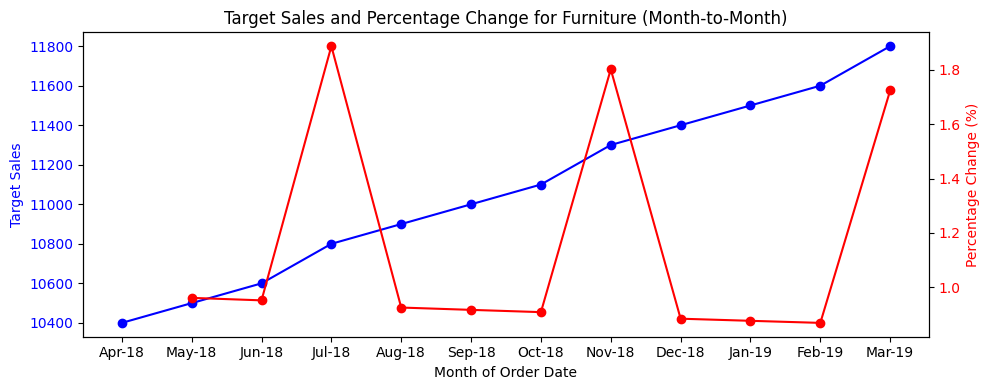

In [18]:
## Imporint required library for visualization
import matplotlib.pyplot as plt

## Plot the target sales and percentage change

fig, ax1 = plt.subplots(figsize=(10,4))

## Plot the target sales on primary axis

ax1.plot(furniture_target['Month of Order Date'], furniture_target['Target'], color='blue', marker='o', label='Target Sales')
ax1.set_xlabel('Month of Order Date')
ax1.set_ylabel('Target Sales', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create Second axis for percentage change

ax2 = ax1.twinx()
ax2.plot(furniture_target['Month of Order Date'], furniture_target['Percentage Change'], color='red', marker='o', label='Percentage Change')
ax2.set_ylabel('Percentage Change (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# title and labels

plt.title('Target Sales and Percentage Change for Furniture (Month-to-Month)')
plt.tight_layout()

# Show the plot
plt.show()

Based on the analysis and visualization of the **percentage change in sales targets** for the **Furniture** category, we can observe a relatively stable target increase over time, with slight fluctuations in some months. The highest fluctuation occurred in **July 2018**, with a **1.89%** increase in target sales.

### Key Inferences:
1. **Consistent Growth**: The percentage change is relatively stable, suggesting a gradual increase in targets.
2. **Fluctuations**: The highest fluctuation was in **July 2018 (1.89%)**, and the lowest in **February 2019 (0.87%)**.
3. **No Negative Fluctuations**: No month saw a decrease in the target sales, indicating positive growth expectations.

### Suggested Strategies:
1. **Target Smoothing**: Adopt a more gradual target-setting approach to avoid large fluctuations and ensure steady growth.
2. **Analyze Seasonality**: Review the seasonal trends and adjust targets accordingly for months that show higher or lower sales trends.
3. **Review Historical Data**: Consistently analyze historical sales to set more realistic target expectations.
4. **Regular Adjustments**: Continuously review and adjust targets monthly to ensure they remain achievable.
5. **Sales Team Collaboration**: Work with the sales team to align targets with market conditions and customer behavior.
6. **Clear Communication**: Ensure target changes are communicated clearly to all relevant stakeholders to maintain motivation and focus.

----

### Part 3: Regional Performance Insights

In this part, we will identify the **top 5 states** with the highest **order count** from the **Order List** dataset. For each of these states, we will calculate the **total sales** and **average profit**. This will help highlight any **regional disparities** in sales and profitability.

**Approach**:
1. Merge the **Order List** dataset with the **Order Details** dataset on **Order ID**.
2. Group by **State** to calculate the **total sales** and **average profit** for each state.
3. Identify the top 5 states based on **order count**.
4. Analyze the regional performance and highlight any disparities in sales and profitability.

In [19]:
## Group by Sate to calculate order count, total sales and average profit

regional_performance = merged_df.groupby('State').agg(
    order_count = ('Order ID', 'count'),
    total_sales = ('Amount', 'sum'),
    average_profit = ('Profit', 'mean')
).reset_index()

## Sort by order count to identify the top 5 states

top_5_sates = regional_performance.sort_values(by='order_count', ascending=False, ignore_index=True).head(5)

## Display the top 5 state with order count, total sales and average profit

top_5_sates

,State,order_count,total_sales,average_profit
0,Madhya Pradesh,340,105140.0,16.326471
1,Maharashtra,290,95348.0,21.296552
2,Gujarat,87,21058.0,5.344828
3,Delhi,74,22531.0,40.364865
4,Rajasthan,74,21149.0,16.986486


### Inference:

- **Madhya Pradesh** leads with **340 orders**, generating **1,05,140** in total sales and an **average profit** of **16.33**.
- **Maharashtra** follows with **290 orders** and **95,348** in total sales. Its **average profit** is slightly lower at **21.30**.
- **Gujarat** has **87 orders**, **21,058** in total sales, and the lowest **average profit** of **5.34**.
- **Delhi** and **Rajasthan** have **74 orders** each. Rajasthan shows a higher **average profit** (**16.99**) compared to Gujarat (**5.34**).

#### Regional Disparities:
1. **Top Performers**:
   - **Madhya Pradesh** and **Maharashtra** show strong order counts and sales figures, making them the best-performing states.

2. **Underperforming Regions**:
   - **Gujarat** shows a low order count, low sales, and the lowest average profit, suggesting a need for more targeted sales strategies.
   - **Delhi** and **Rajasthan** show fewer orders but higher **average profit**. More focused marketing strategies could help improve order volumes in these states.

#### Recommendations:
- **Gujarat** should explore ways to increase its order volume and overall sales. Targeted promotions or city-specific marketing campaigns could be beneficial.
- **Delhi** and **Rajasthan** could benefit from campaigns designed to increase their order count, as their higher **average profit** indicates that profitability could improve further with more sales.

----

## Question 2
App Exploration

The Jar App, a mobile application, is used to encourage savings habits in Indians by helping them save on a daily basis.


**What I liked about the Jar App**:


1. **Automated Round Up** - The app automatically rounds up the online purchases and invests the extra change into digital gold. You don't need to do anything - it just saves for you.

2. **Flexible Investment** - You can start saving with little as Rs.10 and chose how often you want to invest - daily, weekly or monthly. 

3. **Easy to use** - The app is rally easy to use and It does not take much time to figure out how to start using.

4. **Safe Gold Storage** - Your digital gold is kept in secure vault.

5. **Conver to Pysical Cold** - If you want, you can convert your digital gold into real gold and have it delivered to your home.




**What could be Improved**:


1. **Clearer Pricing**: Some users have said the investments aren't reflecting current market prices. Being more upfront about the pricing would make the app feel more trustworthy.

2. **Easier Withdrawals**: Some people found it a bit slow and tricky to withdraw money. Making this process faster and simpler would be a nice improvement.

3. **Better Customer Support**: A few users mentioned that it’s hard to get quick help when needed. Improving customer service would make the app feel more reliable.

4. **More Help and Information**: It would be useful if the app gave more information about how digital gold works and how to make smart investments. This would help users feel more confident,

5. **Connect with Other Apps**: It would be great if Jar could connect with other apps or tools so you can see all your finances in one place, instead of switching between different apps.

----

### Question 3

Product Exploration

### New Business Ideas for Jar App:

1. **Micro-Investing in Stocks and Mutual Funds**:

    - **oppurtunity**: Jar could let users invest small amounts in stocks and mutual funds, just like they do with digital gold.

    - **Utilizing Strength**: Since Jar already automates savings, it can do the same for investments in stocks and funds. The app can recommend simple options, and users wouldn’t have to do anything – Jar would take care of the rest.

    - **Benefit**: Users who already trust Jar with their gold savings might want to try investing in other areas to grow their wealth.
    
2. **Personalized Financial Goals**:

    - **Oppurtunity**: Jar could help users set specific financial goals, like saving for a vacation or a down payment on a house, and then create a plan to reach those goals.

    - **Utilizing Strength**: With automation, Jar could help users save automatically toward these goals, making it easy to stick to their plan.

    - **Benefit**: It adds more value for users by giving them a clear, personalized path to reach their financial goals.

3. **Peer-to-Peer Lending**:

    - **oppurtunity**: Jar could create a platform where users can lend money to others or borrow from them, with competitive interest rates.

    - **Utilizing Strength**: People already trust Jar for safe and secure transactions. Automation can manage things like repayments, making it easy for users to lend or borrow money.

    - **Benefit**: It creates more ways for users to make money or access affordable loans, keeping them more engaged with the app.

4. **Emergency Fund Feature**:

    - **Oppurtunity**: Jar could help users build an emergency fund by automatically saving a small amount each month for unexpected expenses.

    - **Utilizing Strength**: The app’s automation makes saving for emergencies simple. Users don’t have to think about it – it just happens.

    - **Benefit**: It addresses a key need for many people who want to be financially secure but aren’t sure where to start.

5. **Credit Score Monitoring**:

    - **oppurtunity**: Jar could offer users a way to track and improve their credit score. If their score drops, the app could offer tips to help them improve it.

    - **Utilizing Strength**: With Jar’s trusted design, users will feel comfortable using this feature. The app can automatically send reminders or advice to help users improve their score.

    - **Benefit**: Credit scores are an important part of financial health, and by helping users track and improve theirs, Jar can provide even more value.


### How Jar Can Add These Services Smoothly:

- **Automation**: Jar already does a great job automating savings, so it can easily add these new features without making things complicated for users. Whether it’s investing or managing loans, the app can handle it automatically, making everything simple and hassle-free.

- **Easy to Use**: Jar’s design is simple and easy to understand, so adding new features like these won’t confuse users. Everything should still be easy to navigate, and all services should feel connected in one place.

- **Trust**: People already trust Jar with their savings, so they’ll likely feel comfortable using these new features too. Since Jar is known for being safe and reliable, users will be more likely to try out these new tools.